In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np
df = pd.read_csv('TrainData.csv')

In [ ]:
df['$\phi$'] = np.arctan(df['V10']/df['U10'])

In [ ]:
def f(row):
    if row['U10'] <= 0 and row['V10'] <= 0:
        val = 2*np.pi - row['$\phi$']
        
    elif row['U10'] > 0 and row['V10'] <= 0:
        val = row['$\phi$']
        
    elif row['U10'] > 0 and row['V10'] > 0:
        val = np.pi - row['$\phi$']
        
    elif row['U10'] <= 0 and row['V10'] > 0:
        val = np.pi + row['$\phi$']
    
    else: val = 99
        
    return val

df['$\theta$'] = df.apply(f, axis=1)

In [83]:
df['hour'] = np.arange(1, 16081, 1)

In [84]:
df

,TIMESTAMP,POWER,U10,V10,WS10,U100,V100,WS100,$\phi$,$\theta$,hour
0,20120101 1:00,0.273678,0.534894,-3.660243,3.699120,0.765355,-4.486657,4.551468,-1.425687,-1.425687,1
1,20120101 2:00,0.086796,0.330813,-2.676430,2.696797,0.469875,-3.213752,3.247920,-1.447818,-1.447818,2
2,20120101 3:00,0.006811,-0.065839,-2.029072,2.030140,-0.020893,-2.418119,2.418209,1.538360,4.744825,3
3,20120101 4:00,0.018646,-0.419549,-1.799090,1.847362,-0.444867,-2.149654,2.195203,1.341690,4.941495,4
4,20120101 5:00,0.034812,-0.754224,-1.661526,1.824698,-0.838274,-1.991829,2.161038,1.144675,5.138510,5
...,...,...,...,...,...,...,...,...,...,...,...
16075,20131031 20:00,0.101254,-1.459917,-1.778960,2.301316,-1.974368,-4.936280,5.316483,0.883586,5.399600,16076
16076,20131031 21:00,0.105047,-1.293326,-2.350447,2.682777,-0.781394,-4.903565,4.965433,1.067764,5.215421,16077
16077,20131031 22:00,0.145079,-0.308284,-2.441885,2.461269,0.257905,-4.027432,4.035681,1.445212,4.837973,16078
16078,20131031 23:00,0.180933,1.148765,-2.789011,3.016330,1.628004,-3.520358,3.878572,-1.180082,-1.180082,16079


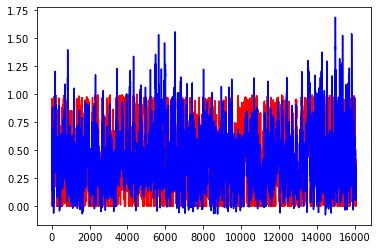

In [86]:
X = df[['WS10', '$\theta$']].values
y = df['POWER'].values

model = linear_model.LinearRegression()
model.fit(X, y)
predicted_power = model.predict(X)

plt.plot(df['hour'], y, 'r')
plt.plot(df['hour'], predicted_power, 'blue')
plt.show()